*Supporting textbook chapters for week 11: Chapters 10.3 & 10.4*

Week 10, topics:
* Monte Carlo for Statistical Mechanics
  * Markov Chain
  * Simulated Annealing
  * Ising Model example

**Monte Carlo simulations:**

> Any simulation that uses random numbers to simulate random physical processes to estimate something about the outcome of that process.

    Newman, p. 476.

We focus on statistical mechanics here.

# Statistical mechanics: a review

* For a system in equilibrium at temperature $T$, the probability of finding the system in any particular state $i$ is given by the Boltzmann distribution,
$$P(E_i) = \frac{\exp\left[-E_i/(k_B T)\right]}{Z}, \quad Z = \sum_{i=1}^{ALL}\exp\left[-E_i/(k_B T)\right]$$
where $E_i$ is the energy of state $i$, $k_B$ is Boltzmann's constant, $Z$ is partition function

* System at temperature $T$ undergoes transitions between states, with probability of being in a particular state $P(E_i)$ 

* To calculate expectation value of a macroscopic property $X$ (e.g. total energy, magnetization, spin): average over the many microstates that the system visits
    $$\left<X\right> = \sum_{i=1}^{ALL}X_i P(E_i)$$
    where $X_i$ is the value of the quantity in the $i^\text{th}$ microstate and $P$ is the probability of finding the system in that microstate. 
* Simple example: single mole of gas has $N_A \approx 6\times 10^{23}$ molecules.
    Assume each molecule had only 2 possible spin states (gross underestimation), then the total number of spin microstates of the mole of gas is $2^{N_A}$, which is huge.
* If we want to get any  useful macroscopic information $\left<X\right>$ about the system, we need to be more clever about how we count than just brute-force counting everything.


$$\left<X\right> = \sum_{i=1}^{ALL}X_i P(E_i), \quad P(E_i) = \frac{\exp\left[-E_i/(k_B T)\right]}{Z}, \quad Z = \sum_{i=1}^{ALL}\exp\left[-E_i/(k_B T)\right]$$


* Huge number of terms in sum $\Rightarrow$ often impossible to perform analytically $\Rightarrow$ use Monte Carlo summation.
* Two difficulties to overcome:
    1. estimating $\left<X\right>$: properly sampling which terms to sum over (*solution: importance sampling*),
    2. estimating $Z$ (*solution: Markov Chain Monte Carlo*)
    

## Importance sampling for Stat. Mech.

* Randomly sample the terms in the sum and only use those as an estimate. Replace
   $\left<X\right> = \sum_{i=1}^{ALL}X_i P(E_i)$
    with a sum over $N$ randomly sampled microstates,
    $$\left<X\right> = \frac{\sum_{i=1}^{N}X_i P(E_i)}{\sum_{i=1}^{N}P(E_i)}.$$
  * Denominator ensures total probability over the sampled states is 1.
* To get a good estimate for the sum, it is only worth keeping the big terms
  * A lot of states have $E_ i \gg k_B T$, therefore $P(E_i)$ really small since probability is proportional to $\exp\left[-E_i/(k_B T)\right]$
* Need to preferentially choose terms where the integrand is non-negligible, but assign them less weight individually (to not bias the final estimate) ... so use importance sampling!



* For a dicrete sum (see p. 478),
    $$\left<X\right> = \sum_{i=1}^{N}X_i P(E_i) \approx \frac1N \sum_{k=1}^{N}\frac{X_k P(E_k)}{w_k} \sum_{i=1}^{ALL}w_i.$$
* For weight $w$, use $P(E_i)$
$$\left<X\right> \approx \frac1N \sum_{k=1}^{N}\underbrace{\frac{X_k P(E_k)}{P(E_k)}}_{= X_k} \underbrace{\sum_{i=1}^{ALL}P(E_i)}_{=1}.$$

In the end,
$$\left<X\right> \approx \frac1N \sum_{k=1}^{N} X_k.$$
* Looks simple and no different from mean-value MC,
* but recall that the $X_k$'s are drawn from non-uniform distribution: we randomly choose terms in the sum based on their Boltzmann probabilities, $P(E)$. But how? Recall
    $$P(E_i) = \frac{\exp\left[-E_i/(k_B T)\right]}{Z}, \quad Z = \sum_{i=1}^{ALL}\exp\left[-E_i/(k_B T)\right]$$

* To do it this way, we need $Z$, which is a sum over all states. But if we could do this, we wouldn't need Monte Carlo in the first place!

## Markov chain method

Mish-mashing https://en.wikipedia.org/wiki/Markov_chain and https://en.wikipedia.org/wiki/Markov_property,

> A Markov chain is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. [...] (sometimes characterized as "memorylessness"). In simpler terms, it is a process for which predictions can be made regarding future outcomes based solely on its present state [...]. In other words, conditional on the present state of the system, its future and past states are independent.

* Random walks (Brownian motion) are Markov chains.
* Here: events are jumps in energy states, one after another.

Solution: Use the Markov chain method.
* Text goes into details on how to implement this method with a Metropolis algorithm.
* Crucial key: Metropolis does not directly compute probability to be in one state, but instead uses probability to transition between two states
   * $Z$ cancels out in the process!
* In this lecture, we will summarize it algorithmically first, then briefly outline why it works mathematically.

### Algorithm

1. Choose a random starting state $i$
2. Calculate the energy of that state $E_i$
3. Choose a transition to a new state $j$ uniformly at random from allowed set
4. Calculate the energy of this new state, $E_j$
5. Calculate the acceptance probability for this transition:
    * $P_a = 1\qquad\qquad \qquad \quad \text{if}\ E_j \leq E_i$ (always accept a lower energy state)
    * $\displaystyle P_a = \exp\left(-\frac{E_j - E_i}{k_B T}\right) \quad \text{if}\ E_j > E_i$ (accept a higher energy state sometimes, more often for high $T$).
6. Accept/reject the move according to the acceptance probability
7. Measure the quantity $X$ you want in its current state (new or old $i$) & store it
8. Repeat from step 2.


* How to implement the probability of the event in the previous slide?
    * $P_a = 1\qquad\qquad \qquad \quad \text{if}\ E_j \leq E_i$ (always accept a lower energy state)
    * $\displaystyle P_a = \exp\left(-\frac{E_j - E_i}{k_B T}\right) \quad \text{if}\ E_j > E_i$ (sometimes accept a higher energy state, more often for hight $T$).

* Draw a random number in $[0,1)$. The statement

    `if random() < exp(-(Ej-Ei)/kT):`

    will introduce what to do if the move is accepted (`elif` will introduce what to do if rejected).
    * E.g., at very high $T$, $\exp(\dots) \approx 1$ and almost all moves are accepted.
    * E.g., at low $T$, say, $\exp[-\Delta E/(k_BT)] = 1\%$, then `random()` has 1% chance of drawing a number that is $<1\%$.
    * If $E_j \leq E_i$, then $\exp(\dots) \geq 1$ and `if` statement automatically accepts.

Why does Metropolis create a system where each microstate has a probability $P(E_i)$, the Boltzmann distribution?
* Let $\tau_{ij}$ be transition probability from microstate $i$ to microstate $j$, such that
    $$\frac{\tau_{ij}}{\tau_{ji}} = \frac{P(E_j)}{P(E_i)},$$
    which the Metropolis algorithm satisfies (see p. 482). For example, a small ratio above means 
    * RHS: "*$j$ is much less probable than $i$*" and equivalently,
    * LHS: "*probability of $j\to i$ is much higher than $i\to j$*", 
  
    both statements being true in equal amounts.
* "In equal amounts" is crucial: it means that if you start from any initial state, your system will progressively evolve towards one where all microstates follow Boltzmann.
* Does it always converge? Yes. If you love linear algebra, see proof in Appendix D of Newman (it is actually quite elegant).

## Example: Ising model

* Simple model of ferromagnetism, demonstrating many physical characteristics of fancier models.
* Assume an object is made up of a collection of dipoles (e.g., electron spins) and the net magnetization is the sum of the magnetization of all the spins.
* Ising model: 
    * assume the spins can only point up or down.
    * the spins interact and favour parallel alignment of pairs of spins
    * the interactions are non-zero only between nearest neighbours (i.e., distance dependent).
* Macroscopic energy $E$ and magnetization $M$ (with no external field) are given by 
    $$E = -J\sum_{\left<ij\right>} s_i s_j\quad\text{and}\quad M = \sum_{i}s_i$$
    where $s = +1$ if spin is up & $s = -1$ if spin is down.
    * Lowest energy occurs if the spins all line up.

* Spins can randomly flip as the system visits a set of allowable states given its temperature.  At any particular moment the system may look like
![](Ising2D.png)

### Example in 1D

* Create array of dipoles, initial state: random spin at each location.
* Calculate energy & magnetization of state
* Implement Metropolis algorithm:
    * create new state: flip 1 spin randomly 
    * calculate new total energy
    * calculate acceptance probability
    * decide whether to accept or reject new state
    * store 'new' energy & magnetization
    * repeat  

In [ ]:
""" This program calculates the total energy and magnetization
for a 1D Ising model with N dipoles
Author: Nico Grisouard, University of Toronto """

import numpy as np
from random import random, randrange
import matplotlib.pyplot as plt

def energyfunction(J_, dipoles):
    energy = -J_*np.sum(dipoles[0:-1]*dipoles[1:])
    return energy

def acceptance(ARGUMENTS):
    """ Function for acceptance probability; to be completed """
    # Do stuff here
    return result  # result is True or False

In [ ]:
# define constants
kB = 1.0  # "Boltzmann" constant
T = 1.0  # "Temparature"
J = 1.0  # Interaction
num_dipoles = 100
N = 100  # number of flips

# generate array of dipoles and initialize diagnostic quantities
dipoles = np.ones(num_dipoles, int)  # hint: this will not work
energy = []
magnet = []
E = energyfunction(J, dipoles)
energy.append(E)
magnet.append(sum(dipoles))


In [ ]:
print(dipoles)

In [ ]:
for i in range(N):
    picked = randrange(num_dipoles)  # choose a dipole
    dipoles[picked] *= -1  # propose to flip this dipole
    Enew = energyfunction(J, dipoles)  # compute Energy of proposed new state

    # calculate acceptance probability
    accepted = acceptance(Enew, E,)

    # store energy and magnetization

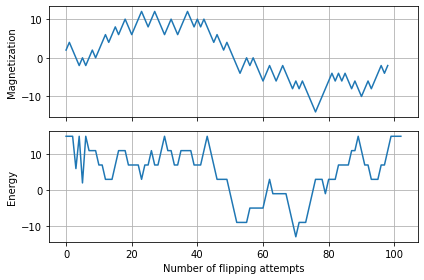

In [15]:
# plot energy, magnetisation
fg, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(magnet)
ax[0].set_ylabel('Magnetization')
ax[0].grid()
ax[1].plot(energy)
ax[1].set_xlabel('Number of flipping attempts')
ax[1].set_ylabel('Energy')
ax[1].grid()

plt.tight_layout()
plt.show()

# Simulated annealing

* Using Monte Carlo simulations to find **global** minima/maxima.
* In week 4 we talked about ways of finding local minima, which worked well if we had one, well-bracketed minimum. How about multiple local minima?
* How it works:  rewrite max/min problem as looking for a "ground state energy" of a system.
    * Function $f$ that you want the max/min of: make this the energy function.
    * how could you find ground state: reduce temperature until you reach the ground state.
* Issue: if you reduce temperature too quickly: might get caught in a local min instead of the global min.
* Solution: reduce temperature slowly.
    This way system has time to explore many microstates and find a good approximation to the global minimum.


* Visual Analogy: particle in a bumpy potential.
    * Too low energy: get stuck in nearest local minimum.
    * Keep low energy but allow some random 'kicks' in energy: can kick out of local minimum and continue heading to global minimum
    * ![](Hill_Climbing_with_Simulated_Annealing.png)

       (https://commons.wikimedia.org/wiki/File:Hill_Climbing_with_Simulated_Annealing.gif)

## Example: travelling salesman

* Famous NP-hard problem (https://en.wikipedia.org/wiki/NP-hardness): what is the shortest route to visit a given set of locations on a map?
* Want global minimum of distance
* Start with random route, swap 2 cities, use Metropolis algorithm to determine whether to keep the swap
  * "energy" in this case is the total distance of the route
  * You can explore this problem using code from the book (`salesman.py`).

![Newman's fig. 10.6](fig10-6.png)

## Summary

* Stat mech results often involve sums over impractical number of terms
  * Monte Carlo can sample a representative number of microstates: importance sampling
     * weight = probability of given microstate
  * How to compute partition function: Markov Chain using Metropolis algorithm.
    * Randomly explore states by transitioning from one microstate to the next
    * Works because the transition probability is closely related to the ratios of probabilities of being in either state.
   * Famous and fundamental example: the Ising model.

* Simulated annealing for finding global minimum of a function: let $f$ be the "energy", and lower the "temperature" progressively
  * Famous example: travelling salesman problem